https://research.ibm.com/haifa/ponderthis/challenges/July2023.html

A game is played on a 2D board:

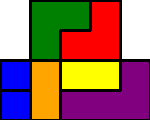

During every turn of the game, one piece is chosen and can be moved one step right, left, up or down, given enough free space in that direction.

The cost of moving a piece is 5-s where s is the size of the piece, so moving a piece composed of four squares costs 1, while moving a piece of one square costs 4.

The goal of the game is to arrange the board according to some goal, with minimum cost.

Note that pieces of the same size and shape are considered identical.

For example, given the following goal for the original board above:

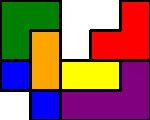

The sequence of steps reaching the goal from the beginning is:

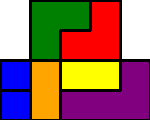

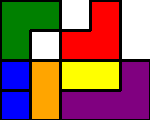

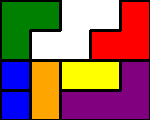

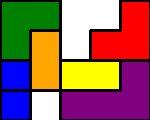

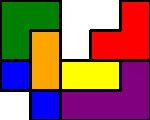

The cost of the first 2 moves is 2, the third one is 3, and the last one is 4, totaling 11.

Given a board, a compact way to describe a solution is to number all the pieces, and then write a string of the form "3U5L" etc. to denote moves (first the number of the shape, and then the direction: U=Up, L=Left, R=Right, D=Down).

For the above board, we can use the following numbering:

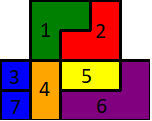


So the solution is written as the following:

"1L2R4U7R"
Your goal Starting from this initial board:


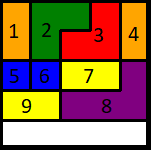

Find a solution with a cost of no more than 100 that reaches the following goal:

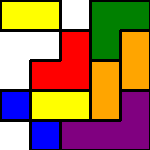

A bonus "*" will be given for finding a solution with a cost of no more than 150 which, using the same initial board, reaches the following goal:

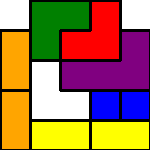

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
import math

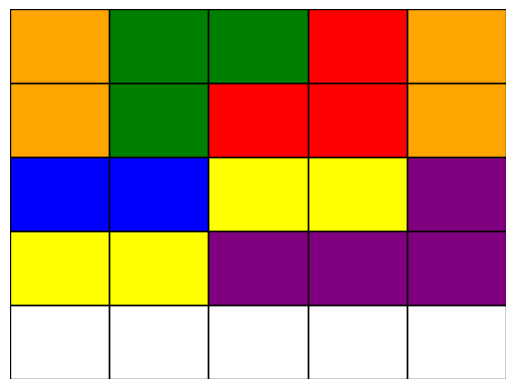

In [ ]:
startingGrid = [[1,2,2,3,4],
                [1,2,3,3,4],
                [5,6,7,7,8],
                [9,9,8,8,8],
                [0,0,0,0,0]]
def prettyPrint(grid):
    cmap = colors.ListedColormap(['white', 'orange', 'green', 'red', 'orange', 'blue', 'blue', 'yellow', 'purple', 'yellow'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    sns.heatmap(grid, cmap=cmap, norm=norm, cbar=False)
    for (j,i), value in np.ndenumerate(grid):
        left, right, top, bottom = i, i+1, j, j+1
        plt.gca().add_patch(patches.Rectangle((left, top), right-left, bottom-top, fill=False, edgecolor='black'))
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    plt.show()
prettyPrint(startingGrid)

In [ ]:
# expands a board based on coordinates of the top left cell occupied by pieces.
startCompact = ((0,0),(1,0),(2,0),(4,0),(0,2),(1,2),(2,2),(2,2),(0,3))
goalCompact = ((3,2),(3,0),(1,1),(4,1),(0,3),(1,4),(0,0),(2,3),(1,3))
def buildFullGrid(compactGrid):
  numGrid = [[0 for i in range(5)] for j in range(5)]
  for i in range(1,len(compactGrid)+1):
    x = compactGrid[i-1][0]
    y = compactGrid[i-1][1]
    if x < 0 or y < 0:
      return
    # Orange cells
    if i == 1 or i == 4:
      numGrid[y][x] = i
      numGrid[y+1][x] = i
    # Green cells
    elif i == 2:
      numGrid[y][x] = i
      numGrid[y+1][x] = i
      numGrid[y][x+1] = i
    # Red cells
    elif i == 3:
      numGrid[y][x+1] = i
      numGrid[y+1][x] = i
      numGrid[y+1][x+1] = i
    # Blue cells
    elif i == 5 or i == 6:
      numGrid[y][x] = i
    # Yellow cells
    elif i ==7 or i == 9:
      numGrid[y][x] = i
      numGrid[y][x+1]= i
    # Purple cells
    else:
      numGrid[y][x+2] = i
      numGrid[y+1][x] = i
      numGrid[y+1][x+1] = i
      numGrid[y+1][x+2] = i
  return numGrid
# Checks if a grid can be expanded into a valid board
def validateBoard(compactGrid):
  try:
    generatedGrid = buildFullGrid(compactGrid)
    whiteCount = 0
    for i in range(5):
      for j in range(5):
        if generatedGrid[i][j] == 0: whiteCount += 1
    return (whiteCount == 5)
  except:
    return False
def heuristicDistance(startCompact, goalCompact):
  def manhattanDist(coords1,coords2): return abs(coords1[0]-coords2[0])+abs(coords1[1]-coords2[1])
  def crossDist(scoords1,scoords2,ecoords1,ecoords2): return min(manhattanDist(scoords1,ecoords1)+manhattanDist(scoords2,ecoords2),manhattanDist(scoords1,ecoords2)+manhattanDist(scoords2,ecoords1))
  # We use the admissible heuristic that comes from relaxing the rules, allowing blocks to move over each other.
  totalDist = 0
  totalDist += 3*crossDist(startCompact[0],startCompact[3],goalCompact[0],goalCompact[3]) # Orange Distance
  totalDist += 2*manhattanDist(startCompact[1],goalCompact[1])  # Green Distance
  totalDist += 2*manhattanDist(startCompact[2],goalCompact[2])  # Red Distance
  totalDist += 4*crossDist(startCompact[4],startCompact[5],goalCompact[4],goalCompact[5])  # Blue Distance
  totalDist += 3*crossDist(startCompact[6],startCompact[8],goalCompact[6],goalCompact[8])  # Yellow Distance
  totalDist += manhattanDist(startCompact[7],goalCompact[7])  # Purple Distace
  return totalDist
# swaps coordinates of same color blocks, so that the one with smaller x value comes first. Ties are broken by y value.
def standardizeCompact(boardCompact):
  def coordCompare(c1,c2): return 25*c1[0]+c1[1]-25*c2[0]-c2[1] > 0
  def swap(li,pos1,pos2):
    temp = li[pos1]
    li[pos1] = li[pos2]
    li[pos2] = temp
  l = list(boardCompact)
  if coordCompare(l[0],l[3]): swap(l,0,3) # Orange
  if coordCompare(l[4],l[5]): swap(l,4,5) # Blue
  if coordCompare(l[6],l[8]): swap(l,6,8) # Yellow
  return tuple(l)

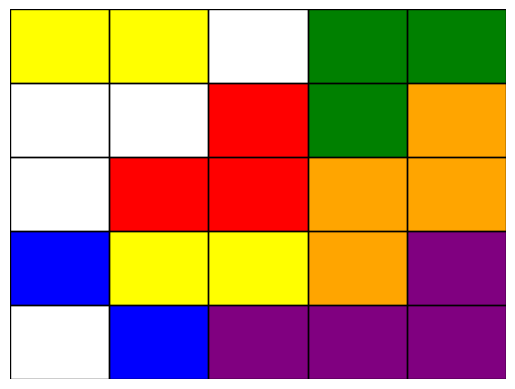

54
((0, 0), (1, 0), (2, 0), (4, 0), (0, 2), (1, 2), (2, 2), (2, 2), (0, 3))
((0, 0), (1, 0), (2, 0), (4, 0), (0, 2), (1, 2), (0, 3), (2, 2), (2, 2))
((3, 2), (3, 0), (1, 1), (4, 1), (0, 3), (1, 4), (0, 0), (2, 3), (1, 3))
((3, 2), (3, 0), (1, 1), (4, 1), (0, 3), (1, 4), (0, 0), (2, 3), (1, 3))


In [ ]:
validateBoard(startCompact)
prettyPrint(buildFullGrid(goalCompact))
print(heuristicDistance(startCompact,goalCompact))
print(startCompact)
print(standardizeCompact(startCompact))
print(goalCompact)
print(standardizeCompact(goalCompact))

In [ ]:
# We store a state as a list T
# T[0] = accumulatedCost + hieuristic
# T[1] = board compact
# T[2] = Path (string)
# T[3] = accumulatedCost
moveCosts = [3,2,2,3,4,4,3,1,3]
directionCodes = ["R","L","D","U"]
def expand(T,found=[False],goal=goalCompact):
  expansion = []
  newBoard = [list(x) for x in T[1]]
  for i in range(9):
    candidates = []
    newBoard[i][0] += 1
    candidates.append(list(tuple(x) for x in newBoard))
    newBoard[i][0] -= 2
    candidates.append(list(tuple(x) for x in newBoard))
    newBoard[i][0] += 1
    newBoard[i][1] += 1
    candidates.append(list(tuple(x) for x in newBoard))
    newBoard[i][1] -= 2
    candidates.append(list(tuple(x) for x in newBoard))
    newBoard[i][1] += 1
    #print(newBoard)
    for j in range(4):
      if validateBoard(candidates[j]):
        H = heuristicDistance(candidates[j],goal)
        if H == 0:
          print("Found a solution")
          print((H+moveCosts[i]+T[3],candidates[j],T[2]+str(i+1)+directionCodes[j],moveCosts[i]+T[3]))
          found[0] = True
        expansion.append((H+moveCosts[i]+T[3],candidates[j],T[2]+str(i+1)+directionCodes[j],moveCosts[i]+T[3]))
  return expansion
# prettyPrint(buildFullGrid(goalCompact))
# for x in expand([0,goalCompact,""]):
#   prettyPrint(buildFullGrid(x[1]))
#   print(x)

In [ ]:
# Manually implemented heap functions
def heappush(li, val):
  # This function assumes li[0] is occupied by a dummy item.
  pos = len(li)
  li.append(val)
  while li[pos][0] < li[pos//2][0]:
    temp = li[pos]
    li[pos] = li[pos//2]
    li[pos//2] = temp
    pos = pos//2
def heappop(li):
  top = li[1]
  li[1] = li[-1]
  li.pop()
  pos = 1
  while len(li) > 2*pos:
    if (len(li) == 2*pos+1):
      if (li[pos][0] <= li[2*pos][0]): break
      else:
        temp = li[pos]
        li[pos] = li[2*pos]
        li[2*pos] = temp
        break
    if (li[pos][0] <= li[2*pos][0] and li[pos][0] <= li[2*pos+1][0]): break
    if (li[2*pos][0] < li[2*pos+1][0]):
      temp = li[pos]
      li[pos] = li[2*pos]
      li[2*pos] = temp
      pos = 2*pos
    else:
      temp = li[pos]
      li[pos] = li[2*pos+1]
      li[2*pos+1] = temp
      pos = 2*pos+1
  return top
def AStarSearch(start,goal,announceFreq = 10**4):
  visited = set()
  MinPQ = [[0],[heuristicDistance(start,goal),start,"",0]]
  counter = [0]
  nodes_checked = 0
  next_max = announceFreq
  found = [False]
  while(len(MinPQ)==1 or not found[0]):
    top = heappop(MinPQ)
    if standardizeCompact(top[1]) in visited:
      continue
    else: visited.add(standardizeCompact(top[1]))
    nodes_checked += 1
    if (nodes_checked >= next_max):
      print("Nodes expanded: "+str(next_max)+"   Nodes expanded: "+str(counter[0])+"   Heap Size: "+str(len(MinPQ))+"    topVal: "+str(top[0]))
      next_max += announceFreq
    for item in expand(top,found,goal):
      heappush(MinPQ,item)
  return
AStarSearch(startCompact,goalCompact)

Nodes expanded: 10000   Nodes expanded: 0   Heap Size: 13262    topVal: 96
Found a solution
(100, [(3, 2), (3, 0), (1, 1), (4, 1), (0, 3), (1, 4), (0, 0), (2, 3), (1, 3)], '8D9D6D5D7L7L3D2R1R3D4D2R1R7U6U3L5U7U5U6L3L1D1D1R3R3U9U9R6D5D6D5D6R', 100)


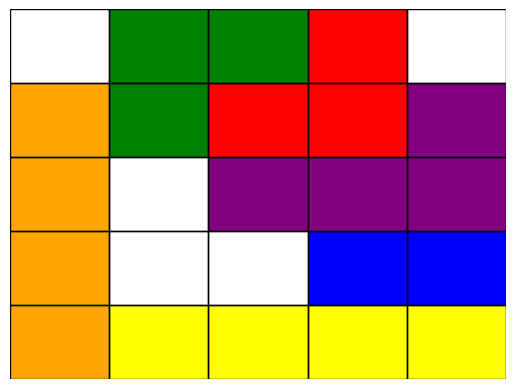

Nodes expanded: 10000   Nodes expanded: 0   Heap Size: 13339    topVal: 102
Nodes expanded: 20000   Nodes expanded: 0   Heap Size: 22086    topVal: 112
Nodes expanded: 30000   Nodes expanded: 0   Heap Size: 25295    topVal: 118
Nodes expanded: 40000   Nodes expanded: 0   Heap Size: 27509    topVal: 126
Nodes expanded: 50000   Nodes expanded: 0   Heap Size: 31639    topVal: 130
Nodes expanded: 60000   Nodes expanded: 0   Heap Size: 34509    topVal: 136
Nodes expanded: 70000   Nodes expanded: 0   Heap Size: 37694    topVal: 140
Nodes expanded: 80000   Nodes expanded: 0   Heap Size: 41786    topVal: 144
Nodes expanded: 90000   Nodes expanded: 0   Heap Size: 44209    topVal: 148
Found a solution
(150, [(0, 3), (1, 0), (2, 0), (0, 1), (4, 3), (3, 3), (1, 4), (2, 1), (3, 4)], '8D7D6R5R9D1D1D2L7L3L4L4D4D3R2R1U1U5L6L7L4L3R3D2R2R4U4U4L2L3U8U9R9R7D9R5D5R7R1D1D4L2L1D3L8U5R5R5R4D6D6R6R', 150)


In [ ]:
starCompact = ((0,1),(1,0),(2,0),(0,3),(3,3),(4,3),(1,4),(2,1),(3,4))
prettyPrint(buildFullGrid(starCompact))
AStarSearch(startCompact,starCompact)

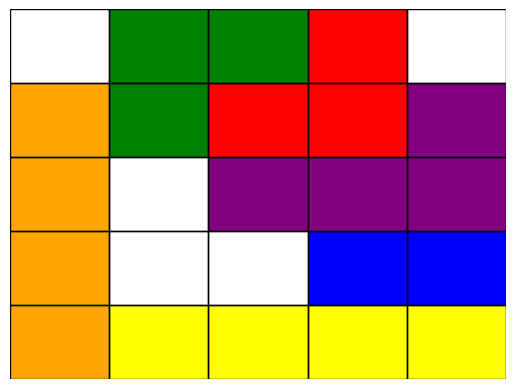

In [ ]:
prettyPrint(buildFullGrid([(0, 3), (1, 0), (2, 0), (0, 1), (4, 3), (3, 3), (1, 4), (2, 1), (3, 4)]))